# <center> Unsupervised Learning Methods </center>
## <center> Problem Set 1 </center>
### <center> Optimization and Clustering </center>

In [6]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

In [7]:
from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

 # 1. Optimization

## 1.3 Descent Methods

### Gradient descent
* Let $\boldsymbol{Y}\in\mathbb{R}^{d\times d}$ be a blurred version
of the image $\boldsymbol{X}\in\mathbb{R}^{d\times d}$:
$$\boldsymbol{Y}=\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}$$
where $\boldsymbol{H}\in\mathbb{R}^{d\times d}$ is a known (separable)
blurring matrix.

#### Load the data ($\boldsymbol{Y}$ and $\boldsymbol{H}$):

In [9]:
from scipy.io import loadmat
file="data.mat"
data = loadmat(file)
Y    = data['Y']
H    = data['H']

Y.shape, H.shape

((256, 256), (256, 256))

#### Plot $Y$ and $H$:

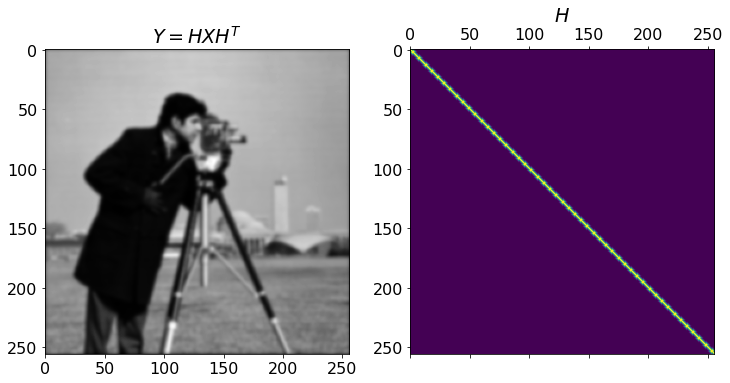

In [10]:
_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y, cmap='gray')
ax[1].matshow(H)
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$H$')
plt.show()

* Our goal is to find $\boldsymbol{X}$ that minimizes:
$$\boldsymbol{X}^{\star}=\arg\min_{\boldsymbol{X}}f\left(\boldsymbol{X}\right)=\arg\min_{\boldsymbol{X}}\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

### 1.3.1
1. Find a closed form expression for $\boldsymbol{X}^{\star}$ as a function of $\boldsymbol{Y}$ and $\boldsymbol{H}$.
2. Compute $\boldsymbol{X}^{\star}$ and plot it.

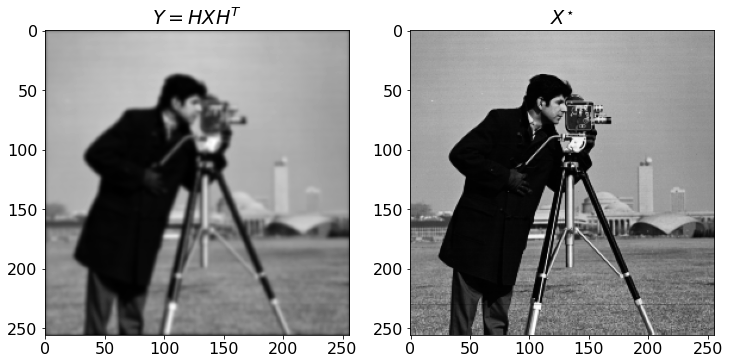

In [177]:


Xstar = np.linalg.inv(H) @ Y @  np.linalg.inv(H.T)

_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(Y,     cmap='gray')
ax[1].imshow(Xstar, cmap='gray')
ax[0].set_title('$Y = H X H^T$')
ax[1].set_title('$X^{\star}$')
plt.show()

------------------------------------------------------------------------------------------------------
* To avoid matrix inversion, we will find $\boldsymbol{X}^{\star}$ using gradient descent.
### 1.3.2
1. Implement the following functions where
$$f\left(\boldsymbol{X}\right)=\left\Vert \boldsymbol{Y}-\boldsymbol{H}\boldsymbol{X}\boldsymbol{H}^{T}\right\Vert _{F}^{2}$$

```python
#==================================================#
def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''
    pass
#==================================================#
#==================================================#
def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    pass
#==================================================#
#==================================================#
def ApplyGradientDescent(f, Df, X0, lr, ε):
    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
#==================================================#
```

2. Set a reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 

the method took 9999 iterations
the method run for  0:01:14.549233


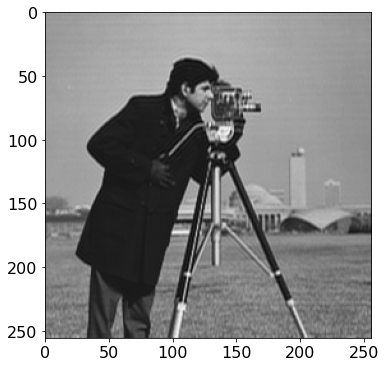

In [184]:
from datetime import datetime


def f(X):
    '''
    f(X) = ||Y - HXH^T||_F^2 is the objective function
    '''

    return (np.linalg.norm(Y - H @ X @ H.T)) ** 2


def Df(X):
    '''
    Df(X) = ∇f(X) is the objective gradient
    '''
    gradient = - 2 * H @ H.T @ (Y - H @ X @ H.T)
    return gradient


def ApplyGradientDescent(f, Df, X0, lr, epsilon):

    '''
    Apply gradient descent.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < 
        
    '''

    X = X0.copy()
    for i in range(10000):
      if f(X) < epsilon:
        break
      gradient = Df(X)
      X = X - gradient * lr
    
    return X, i
# ==================================================#

starting_time = datetime.now()
X_star, i = ApplyGradientDescent(f, Df, Y, 0.1, 0.0001)
ending_time = datetime.now()

_, ax = plt.subplots(1, 1, figsize=(12, 6))

print("the method took {} iterations".format(i))
print("the method run for  {}".format(ending_time - starting_time))
ax.imshow(X_star, cmap='gray')
plt.show()



------------------------------------------------------------------------------------------------------
### Momentum
* <ins>Momentum</ins> is an effective method to improve convergence rate.
* Gradient descent update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)$$
* Momentum update rule:
$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t-1\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t-1\right)}-\boldsymbol{x}^{\left(t-2\right)}\right)$$
where $\beta\in[0,1)$ and typically $0.9\leq\beta\leq0.99$.

### 1.3.3
Show that $\boldsymbol{x}^{\left(t\right)}$ can be expressed by:
$$\boldsymbol{x}^{\left(t+1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

We will show it by induction:

Base
t = 1:

$$\boldsymbol{x}^{\left(1\right)}= \boldsymbol{x}^{\left(t-1\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(0\right)}\right)+\beta\left(\boldsymbol{x}^{\left(0\right)} - 0\right) = \boldsymbol{x}^{\left(0\right)}-\mu\sum_{s=0}^{0}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

So the base case is true

step:

Weil will assume correctness for k = t

$$\boldsymbol{x}^{\left(t\right)}=\boldsymbol{x}^{\left(t - 1\right)}-\mu\sum_{s=0}^{t - 1}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$

We will show correctness for k = t + 1

$$\boldsymbol{x}^{\left(t + 1\right)}=\boldsymbol{x}^{\left(t\right)}-\mu\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t\right)}-\boldsymbol{x}^{\left(t-1\right)}\right) = \boldsymbol{x}^{(t)} - \mu\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)+\beta\left(\boldsymbol{x}^{\left(t - 1\right)}-\mu\sum_{s=0}^{t - 1}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)-\boldsymbol{x}^{\left(t-1\right)}\right) = \boldsymbol{x}^{(t)} - \beta^{0}\mu\nabla f\left(\boldsymbol{x}^{\left(t\right)}\right)+\beta\left(-\mu\sum_{s=0}^{t - 1}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)\right) = \boldsymbol{x}^{\left(t\right)}-\mu\sum_{s=0}^{t}\beta^{t-s}\nabla f\left(\boldsymbol{x}^{\left(s\right)}\right)$$




------------------------------------------------------------------------------------------------------
### 1.3.4
1. Implement the following function:

```python
def ApplyGradientDescentMomentum(f, Df, X0, lr, β, ε):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    pass
```

2. Set (the same) reasonable starting point $\boldsymbol{X}^{\left(0\right)}$.
3. Find $\boldsymbol{X}$ such that $f\left(\boldsymbol{X}\right)<\epsilon$ where $\epsilon=10^{-4}$.
    * Time your function.
    * Plot the final obtained $\boldsymbol{X}$. 
    * Compare the run-time performance with and without momentum.  
      (play with the hyper-parameters).
        * **2% Bonus:**  
            Plot the objective value $f(\boldsymbol{X})$ as a function of the iterations.  
            You may need to slightly modify your code.

the method took 9999 iterations
the method run for  0:01:19.576925


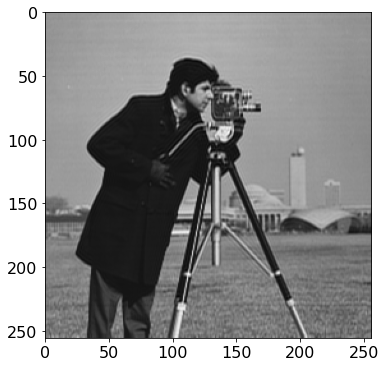

In [185]:
def ApplyGradientDescentMomentum(f, Df, X0, lr, beta, epsilon):
    '''
    Apply gradient descent with momentum.
    Args:
        f  - Objective function
        Df - Objective gradient
        X0 - Initial point
        lr - Learning rate (step size)
        β  - Momentum decaying factor
        ε  - Stopping criterion value
    Output:
        X  - The converged X
    Stopping criterion:
        Stop iterate when f(X) < ε
    '''
    X_t1 = 0
    X_t2 = 0
    X = X0.copy()
    for i in range(10000):
      if f(X) < epsilon:
        break
      gradient = Df(X)
      X = X - gradient * lr + beta * (X_t1 - X_t2)
      X_t2 = X_t1
      X_t1 = X
    
    return X, i
# ==================================================#
_, ax = plt.subplots(1, 1, figsize=(12, 6))

starting_time = datetime.now()
X_star_moment, i = ApplyGradientDescentMomentum(f, Df, Y, 0.1, 0.9, 0.0001)
ending_time = datetime.now()

print("the method took {} iterations".format(i))
print("the method run for  {}".format(ending_time - starting_time))
ax.imshow(X_star_moment, cmap='gray')
plt.show()

------------------------------------------------------------------------------------------------------
# 2. Clustering
## 2.1 K-Means
### 2.1.3
Implement the K-Means algorithm.
```python
def KMeans(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K
        
    '''
    pass
```
**Notes**:
* The algorithm halts when no update occur.  
* **4% Bonus**: Implement the K-Menas++ initialization: https://en.wikipedia.org/wiki/K-means%2B%2B
------------------------------------------------------------------------------------------------------

In [186]:
import random

def KmeansPlusPlusInitializtion(mX, K):
  # print("starting initialization inside")
  # clusters = [random.choice(mX)]
  # for i in range(1, K):
  #   distances = [min([np.linalg.norm(p1 - p2) for p2 in clusters]) for p1 in mX]
  #   clusters.append(random.choices(mX, weights=distances)[0])
  
  # return np.stack(clusters)
  return mX[:K]

In [187]:
def equal_arrays(arr1, arr2):
  return np.array_equal(arr1, arr2)

In [15]:
from scipy.spatial.distance import cdist

def KMeans(mX, K):

    mMui = KmeansPlusPlusInitializtion(mX, K)
    mMui_prev = np.zeros(mMui.shape)
    numIter = 100

    for ii in range(numIter):
      if equal_arrays(mMui_prev, mMui):
        break
      mMui_prev = mMui.copy()
        #-- Step 1, assign clusters:
      mD   = cdist(mX, mMui)
      vIdx = np.argmin(mD, axis=1)

      #-- Step 2, compute clusters means
      for kk in range(K):
          mMui[kk,:] = np.mean(mX[vIdx == kk], axis=0)
      
      
        

      return mMui, vIdx

In [16]:
# from statistics import mean

def KMeans(mX, K):
    '''
    Apply K-Means
    Args:
        mX   - Input data,         mX.shape = d, N
        K    - Number of clusters, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        mMu  - Clusters' centers,                          mMu.shape  = d, K
 
    '''

    centroids = KmeansPlusPlusInitializtion(mX, K)
    centroids_prev = np.zeros(centroids.shape)

    while not equal_arrays(centroids, centroids_prev):

      distances = [[[i, np.linalg.norm(p - centroid)] for i, centroid in enumerate(centroids)] for p in mX]
      vIdx = [min(point_distances, key= lambda x: x[1])[0] for point_distances in distances]
      new_centroids = np.array([np.mean([mX[j] for j in range(len(mX)) if vIdx[j] == centroid_index], axis=0) for centroid_index in range(len(centroids))])
      centroids_prev = np.array(centroids)
      centroids = np.array(new_centroids)

    return centroids, vIdx



### Super-pixels
1. Load the `Fruits.jpeg` image and covert it to NumPy ndarray `mI`:
$$\boldsymbol{I}\in\mathbb{R}^{\text{height}\times\text{width}\times3}$$
2. Use the LAB color space (instead of RGB) (`mLAB`).
3. Create a new "image" `mX` such that:
$$\boldsymbol{X}\in\mathbb{R}^{\text{height}\times\text{width}\times5}$$
where:
    * The first 3 channels are the LAB image.
    * The 4th channel is the $x$ position.
    * The 5th channel is the $y$ position.
4. Apply K-Means to the pixels of `mX` (set a reasonable $K$).
5. Create a mask image `mMask` such that:
$$\boldsymbol{M}\in\mathbb{R}^{\text{height}\times\text{width}}$$
where each pixel in `mMask` is the cluster index of the corresponding pixel in `mI`.
6. Plot the segmentation (Superpixels) map.

**Tip:** Try different weights for the LAB image and the XY position.

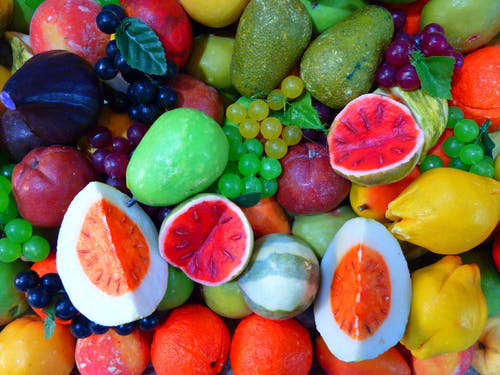

In [5]:
from PIL                  import Image
from skimage              import color
from skimage.segmentation import mark_boundaries

fruits_file="Fruits.jpeg"


oImage = Image.open(fruits_file)
oImage

In [1]:
mI   = np.array(oImage)
mLAB = color.rgb2lab(mI)

mX = mI.tolist()
for row in range(mLAB.shape[0]):
  for col in range(mLAB.shape[1]):
    mX[row][col].extend([row, col])

mX = np.array(mX).reshape(-1, 5)

centroids, vIdx = KMeans(mX, 5)

mMask = np.array(vIdx).reshape(mLAB.shape[0], mLAB.shape[1])

mO = mark_boundaries(mI, mMask, color=(0,1,1))

plt.figure(figsize=(12, 12))
plt.imshow(mO)
plt.show()

NameError: name 'np' is not defined

------------------------------------------------------------------------------------------------------
## 2.2 GMM
The GMM algorithm aims to maximize the (log) likelihood objective:
$$\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}f=\arg\max_{\left\{ \left(w_{k},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right\} _{k=1}^{K}}\sum_{i=1}^{N}\log\left(\sum_{k=1}^{K}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i};\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)\right)$$
### 2.2.3
Implement the GMM algorithm.
```python
def GMM(mX, K, ε=1e-6, maxIter=100):
    '''
    Apply GMM
    Args:
        mX      - Input data,                   mX.shape = d, N
        K       - Number of clusters,           positive integer
        ε       - Stopping criterion threshold, positive real
        maxIter - Maximum number of iterations, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        vW   - The weight of each Gaussian,                vW.shape   = K
        mMu  - Centers,                                    mMu.shape  = d, K
        mSig - Covariance,                                 mSig.shape = d, d, K
    '''
    pass
```
**Notes**:
* Stopping criteria:
    * The objective $f$ has changed less than $\epsilon$.
    * Maximum number of iteration.
* The index $s$ of the point $\boldsymbol{x}_i$ is defined by:
$$\boldsymbol{x}_{i}\in\mathcal{D}_{s} \iff s=\arg\max_{k}w_{k}\mathcal{N}\left(\boldsymbol{x}_{i},\boldsymbol{\mu}_{k},\boldsymbol{\Sigma}_{k}\right)$$
* **2% Bonus:** Use [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) and avoid `for` loops in step II. 


In [34]:

def GMM(mX, K, ε=1e-6, maxIter=100):
    '''
    Apply GMM
    Args:
        mX      - Input data,                   mX.shape = d, N
        K       - Number of clusters,           positive integer
        ε       - Stopping criterion threshold, positive real
        maxIter - Maximum number of iterations, positive integer
    Output:
        vIdx - Index of the cluster each point belongs to, vIdx.shape = N
        vW   - The weight of each Gaussian,                vW.shape   = K
        mMu  - Centers,                                    mMu.shape  = d, K
        mSig - Covariance,                                 mSig.shape = d, d, K
    '''
    vW0 = np.array([1 / K] * K)
    mMu0 = mX[:K]
    mSig0 = np.stack([np.eye(mX.shape[1]) / 2 + 0.5] * K)
    vW, mMu, mSig = EstimateGmmParams(mX, K, vW0, mMu0, mSig0)
    Px = []
    for k in range(K):
        Px.append(Pz(mX, vW[k], mMu[k], mSig[k, :, :]))

    Px = np.stack(Px).T
    print('shape: ', Px.shape)
    vIdx = np.argmin(Px, axis=1)
    return vIdx


# -- N(x; mu, sig^2):
def Pz(x, w, vMu, mSig):
    return w * sp.stats.multivariate_normal.pdf(x, vMu, mSig)


def EstimateGmmParams(mX, K, vW, mMu, mSig):
    numIter = 30
    for ii in range(numIter):

        # -- Step 1, estimate probabilites:
        Px = []
        for k in range(K):
            Px.append(Pz(mX, vW[k], mMu[k], mSig[k, :, :]))

        sum_probs = 0
        for k in range(K):
            sum_probs += Px[k]

        for k in range(K):
            Px[k] = Px[k] / sum_probs

        # -- Step 2, estimate params:
        Nx = []
        for k in range(K):
            Nx.append(np.sum(Px[k]))
        for k in range(K):
            vW[k] = Nx[k] / sum(Nx)

        for k in range(K):
            mMu[k] = np.sum(Px[k][:, None] * mX, axis=0) / Nx[k]

        for k in range(K):
            mSig[k, :, :] = (Px[k][:, None] * (mX - mMu[k])).T @ (mX - mMu[k]) / Nx[k]

    return vW, mMu, mSig


------------------------------------------------------------------------------------------------------
Consider the following data:

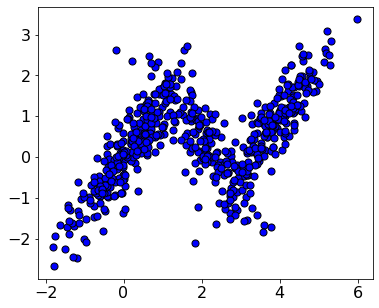

In [18]:
import scipy.stats
import scipy as sp


np.random.seed(0)

N1    = 250
N2    = 150
N3    = 200

vMu1  = np.array([0, 0])
vMu2  = np.array([2, 0.5])
vMu3  = np.array([4, 1])

mSig1 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mSig2 = .5 * np.array([[ 1.00, -1.25],
                       [-1.25,  2.00]])

mSig3 = .5 * np.array([[1.00, 1.25],
                       [1.25, 2.00]])

mX1 = sp.stats.multivariate_normal.rvs(mean=vMu1, cov=mSig1, size=N1)
mX2 = sp.stats.multivariate_normal.rvs(mean=vMu2, cov=mSig2, size=N2)
mX3 = sp.stats.multivariate_normal.rvs(mean=vMu3, cov=mSig3, size=N3)
mX  = np.r_[mX1, mX2, mX3].T

plt.figure(figsize=(6,5))
plt.scatter(mX[0,:], mX[1,:], s=50, edgecolors='k', color='b')
plt.axis('equal')
plt.axis('tight')
plt.show()

### 2.2.4 Compare K-Means to GMM 
* Set $K=3$ and apply K-Means and GMM to the above dataset.
* Repeat several times.

shape:  (600, 3)
shape data:  (600, 2)


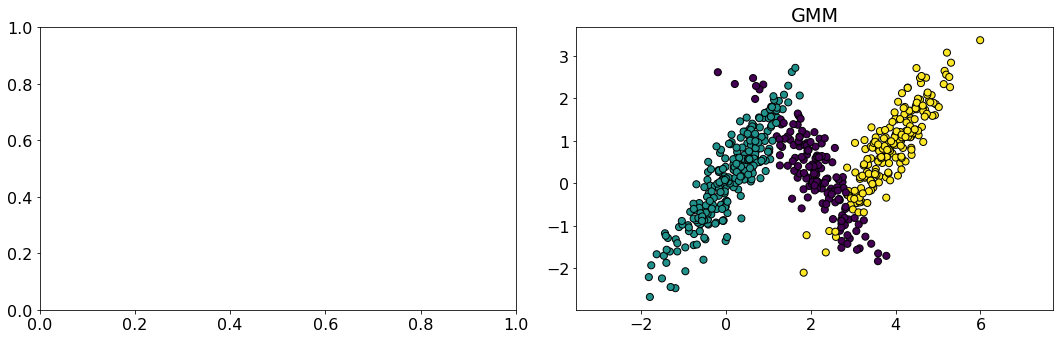

In [35]:
from scipy.spatial import Voronoi, voronoi_plot_2d


def plot_kmeans(ax, data, K):
    mMu, vIdx = KMeans(data, 3)
    Nc = len(np.unique(vIdx))
    ax.scatter(data[:,0], data[:,1], s=50, edgecolors='k', c=vIdx)
    ax.axis('equal')


def plot_gmm(ax, data, K):
  vIdx = GMM(data, 3)
  Nc = len(np.unique(vIdx))
  ax.scatter(data[:,0], data[:,1], s=50, edgecolors='k', c=vIdx)
  ax.axis('equal')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plot_kmeans(axes[0], mX.T, 3)
axes[0].set_title("kmenas")
plot_gmm(axes[1], mX.T, 3)
axes[1].set_title("GMM")


plt.tight_layout()
plt.show()



In [25]:
mX.T.shape

(600, 2)

------------------------------------------------------------------------------------------------------
## 2.4 DBSCAN
### 2.4.1
Implement the DBSCAN algorithm.
```python
def DBSCAN(mX, Z, r):
    '''
    Apply DBSCAN
    Args:
        mX   - Input data,                                   mX.shape = d, N
        Z    - Number of points required to be a core point, positive integer
        r    - Neighborhood radius,                          positive real.
    Output:
        vIdx - Index of the cluster each point belongs to,   vIdx.shape = N
    '''
    pass
```
**Notes**:
* Noise points should have index `-1`.
* Implement an auxiliary function to compute connected components (using BFS or DFS).

In [196]:
from scipy.spatial.distance import cdist
from queue import Queue
import numpy as np


def get_distance(p1, p2):
    return np.linalg.norm(p1 - p2)


def get_clusters(mX, core_points_indexes, r):
    core_points_indexes_set = set(core_points_indexes)
    number_of_points = mX.shape[0]
    vIdx = [-1] * number_of_points
    visited_points = [False] * number_of_points
    current_cluster = 0
    for i in range(number_of_points):
        if visited_points[i] or i not in core_points_indexes_set:
            continue
        vIdx[i] = current_cluster
        visited_points[i] = True
        points_to_check_for_neighbours = Queue()
        points_to_check_for_neighbours.put(mX[i])

        while not points_to_check_for_neighbours.empty():
            current_point = points_to_check_for_neighbours.get()
            for j in range(number_of_points):
                if not visited_points[j] and \
                        j in core_points_indexes_set and \
                        get_distance(current_point, mX[j]) < r:
                    visited_points[j] = True
                    points_to_check_for_neighbours.put(mX[j])
                    vIdx[j] = current_cluster

        current_cluster += 1

    return vIdx


def get_distances_from_point_to_cluster(point, cluster):
    return cdist(point.reshape(1, -1), cluster)[0]


def get_list_of_points_in_correct_distance(points_source, points_target, indexes_to_check, Z, r):
    source_points_indexes = []
    indexes_to_check_set = set(indexes_to_check)
    for i in range(points_source.shape[0]):
        if i not in indexes_to_check_set:
            continue
        distances = get_distances_from_point_to_cluster(points_source[i], points_target)
        distances = distances[distances < r]
        if len(distances) > Z:
            source_points_indexes.append(i)

    return points_source[source_points_indexes], source_points_indexes


def DBSCAN(mX, Z, r):
    '''
    Apply DBSCAN
    Args:
        mX   - Input data,                                   mX.shape = d, N
        Z    - Number of points required to be a core point, positive integer
        r    - Neighborhood radius,                          positive real.
    Output:
        vIdx - Index of the cluster each point belongs to,   vIdx.shape = N
    '''

    # step 1 find core points
    core_points, core_points_indexes = get_list_of_points_in_correct_distance(mX, mX, range(mX.shape[0]), Z, r)
    core_points_indexes_set = set(core_points_indexes)

    # step 2 cluster core points
    vIdx = get_clusters(mX, core_points_indexes, r)

    # step 3 assign boundary points to closest cluster
    boundary_candidates_indexes = [i for i in range(mX.shape[0]) if i not in core_points_indexes_set]
    boundary_points, boundary_points_indexes = get_list_of_points_in_correct_distance(mX, core_points,
                                                                                      boundary_candidates_indexes, 1, r)
    clusters = [np.stack([mX[i] for i in range(mX.shape[0]) if vIdx[i] == cluster]) for cluster in range(max(vIdx) + 1)]
    for boundary_point_index in boundary_points_indexes:
        cluster_dists = np.array([min(get_distances_from_point_to_cluster(mX[boundary_point_index], cluster)) for cluster in clusters])
        cluster_index = np.argmin(cluster_dists)
        vIdx[boundary_point_index] = cluster_index


    return vIdx


### 2.4.2 Comparison
1. Consider the following datasets:

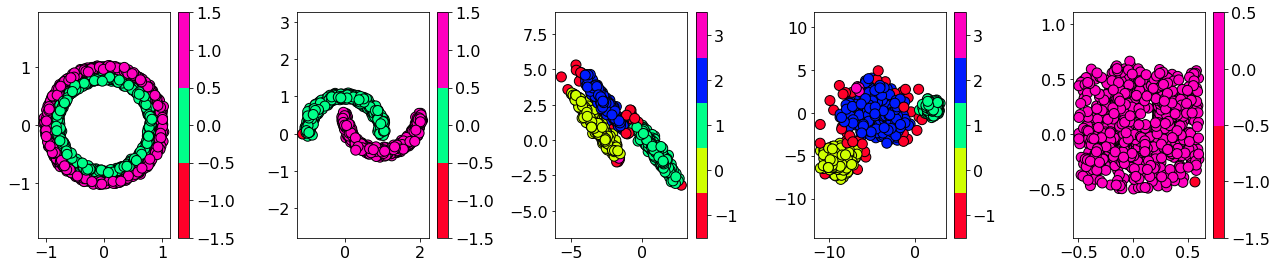

In [197]:
from sklearn import datasets

np.random.seed(0)

N   = 1000
A   = np.array([[0.6, -0.6],
                [-0.4, 0.8]]);
mX1 = datasets.make_circles(n_samples=N, noise=0.02)      [0]
mX2 = datasets.make_moons  (n_samples=N, noise=0.05)      [0]
mX3 = datasets.make_blobs  (n_samples=N, random_state=170)[0] @ A
mX4 = datasets.make_blobs  (n_samples=N, random_state=170, cluster_std=[.8, 2, .4])[0] 
mX5 = np.load('gdrive/MyDrive/unsupervised/ex1/clusterable_data.npy')

lDatasets = [mX1, mX2, mX3, mX4, mX5]
configurations = [(2, 0.06), (3, 0.12), (5, 0.34), (3, 0.7), (2, 0.1)]


fig, ax = plt.subplots(1, 5, figsize=(18, 4))
for ii, ax in enumerate(fig.axes):
    mXi = lDatasets[ii]
    Z = configurations[ii][0]
    r = configurations[ii][1]
    vC = DBSCAN(mXi, Z, r)
    
    Nc = len(np.unique(vC))
    path = ax.scatter(mXi[:,0], mXi[:,1], s=100, c=vC, edgecolor='k', cmap=matplotlib.cm.get_cmap('gist_rainbow', Nc), vmin=-3/2, vmax=Nc-3/2)
    plt.colorbar(path, ax=ax)
    ax.axis('equal')
    
    
    
plt.tight_layout()
plt.show()

2. Apply and compare your clustering methods to these datasets.
    * **2% Bonus:**  
    Add to your comparison the hierarchical and HDBSCAN methods.  
    You may use existing libraries for these methods.
    
**Note:** The datasets are transposed.

DBSCAN:


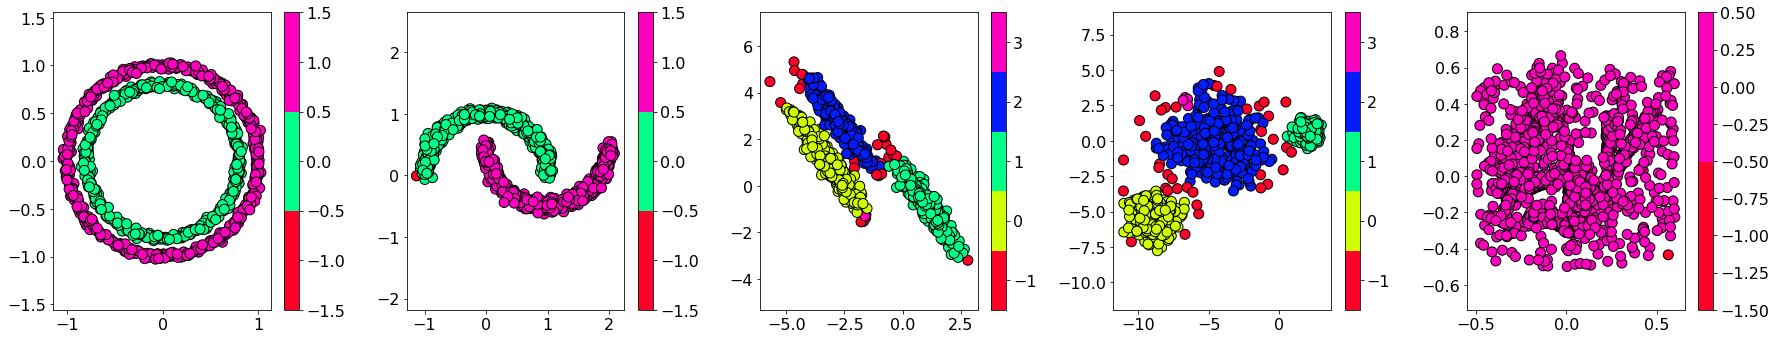




kmeans:


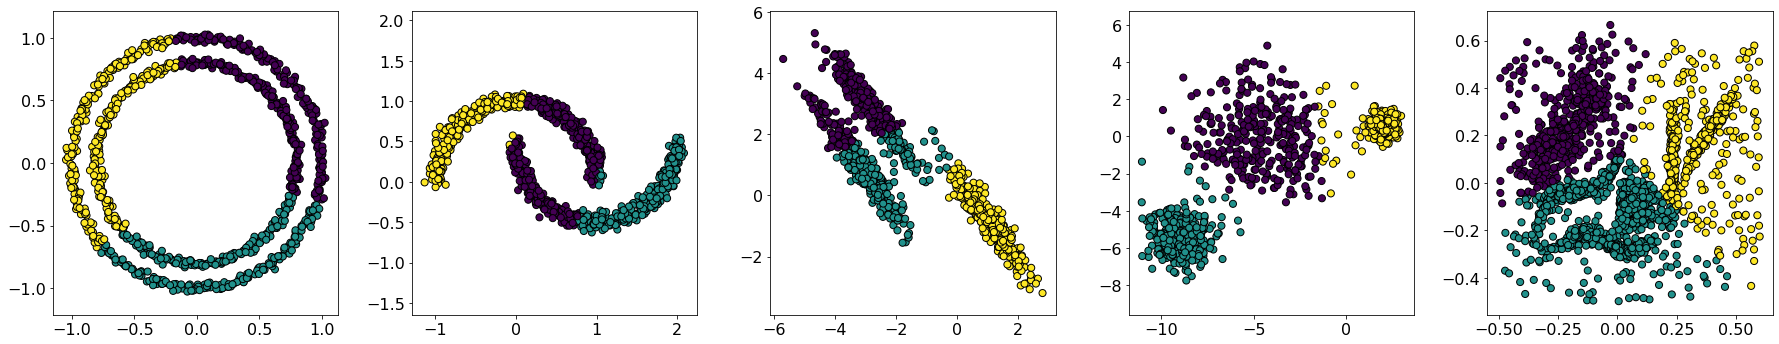



\GMM:


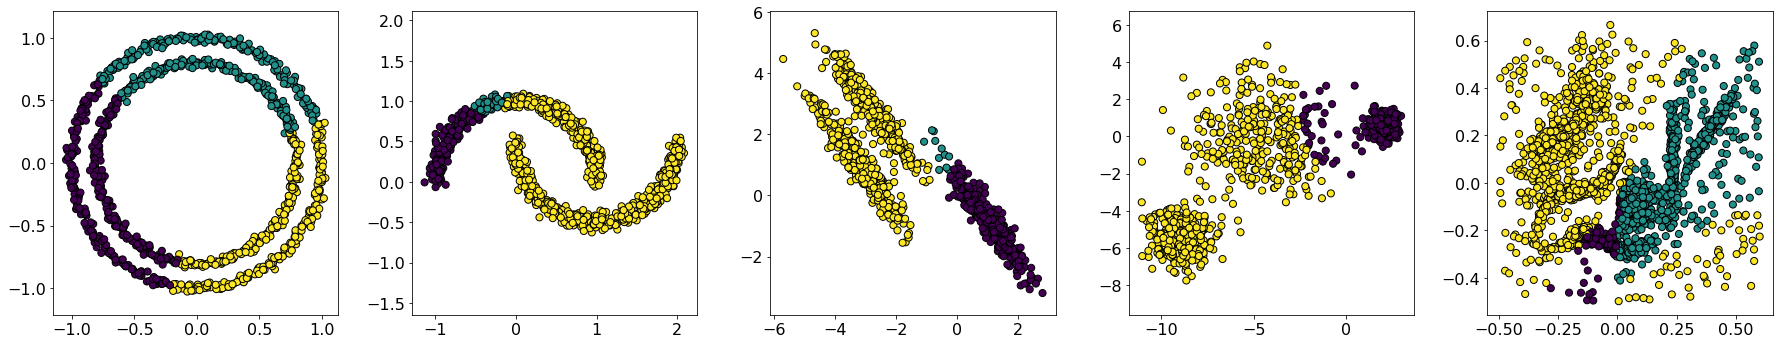

In [198]:
from sklearn import datasets

np.random.seed(0)

N   = 1000
A   = np.array([[0.6, -0.6],
                [-0.4, 0.8]]);
mX1 = datasets.make_circles(n_samples=N, noise=0.02)      [0]
mX2 = datasets.make_moons  (n_samples=N, noise=0.05)      [0]
mX3 = datasets.make_blobs  (n_samples=N, random_state=170)[0] @ A
mX4 = datasets.make_blobs  (n_samples=N, random_state=170, cluster_std=[.8, 2, .4])[0] 
mX5 = np.load('gdrive/MyDrive/unsupervised/ex1/clusterable_data.npy')

lDatasets = [mX1, mX2, mX3, mX4, mX5]
configurations = [(2, 0.06), (3, 0.12), (5, 0.34), (3, 0.7), (2, 0.1)]


fig, axes = plt.subplots(1, 5, figsize=(25, 5))
Ncs = []
print("DBSCAN:")
for ii, ax in enumerate(fig.axes):
    mXi = lDatasets[ii]
    Z = configurations[ii][0]
    r = configurations[ii][1]
    vC = DBSCAN(mXi, Z, r)
    
    Nc = len(np.unique(vC))
    Ncs.append(Nc)
    path = ax.scatter(mXi[:,0], mXi[:,1], s=100, c=vC, edgecolor='k', cmap=matplotlib.cm.get_cmap('gist_rainbow', Nc), vmin=-3/2, vmax=Nc-3/2)
    plt.colorbar(path, ax=ax)
    ax.axis('equal')
    
    
plt.tight_layout()
plt.show()


print("\n\n\nkmeans:")

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for ii, ax in enumerate(fig.axes):
  mXi = lDatasets[ii]
  plot_kmeans(ax, mXi, Ncs[ii])

plt.tight_layout()
plt.show()


print("\n\n\GMM:")

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for ii, ax in enumerate(fig.axes):
  mXi = lDatasets[ii]
  plot_gmm(ax, mXi, Ncs[ii])

plt.tight_layout()
plt.show()
    
    
